### Dataset

In [142]:
from pathlib import Path

Path('../data').mkdir(parents=True, exist_ok=True)
data_housing_file = Path('../data/data_housing.csv').resolve()

if not data_housing_file.exists():
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv --output-document=$data_housing_file

In [143]:
import pandas as pd

usecols = ['latitude',
           'longitude',
           'housing_median_age',
           'total_rooms',
           'total_bedrooms',
           'population',
           'households',
           'median_income',
           'median_house_value',
           'ocean_proximity']
df = pd.read_csv(data_housing_file, usecols=usecols)
df.head(1).T

,0
longitude,-122.23
latitude,37.88
housing_median_age,41.0
total_rooms,880.0
total_bedrooms,129.0
population,322.0
households,126.0
median_income,8.3252
median_house_value,452600.0
ocean_proximity,NEAR BAY


### Data preparation

* Select only the features from above and fill in the missing values with 0.
    * Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [144]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()
print(f"Columns with null values : {df.isnull().sum()[df.isnull().sum()>0]}")
df = df.fillna(0)

df['rooms_per_household'] = df.total_rooms/df.households
df['bedrooms_per_room'] = df.total_bedrooms/df.total_rooms
df['population_per_household'] = df.population/df.households

print(f"Columns {df.dtypes}")

Columns with null values : total_bedrooms    207
dtype: int64
Columns longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object



### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`


In [145]:
df['ocean_proximity'].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
    * Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [146]:
data_class = df.copy()
print(df.dtypes)

from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

len(df_train), len(df_val), len(df_test)

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object


(12384, 4128, 4128)

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [147]:
data_numeric = data_class.copy()
data_numeric = data_class.drop(["median_house_value"], axis=1)
data_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


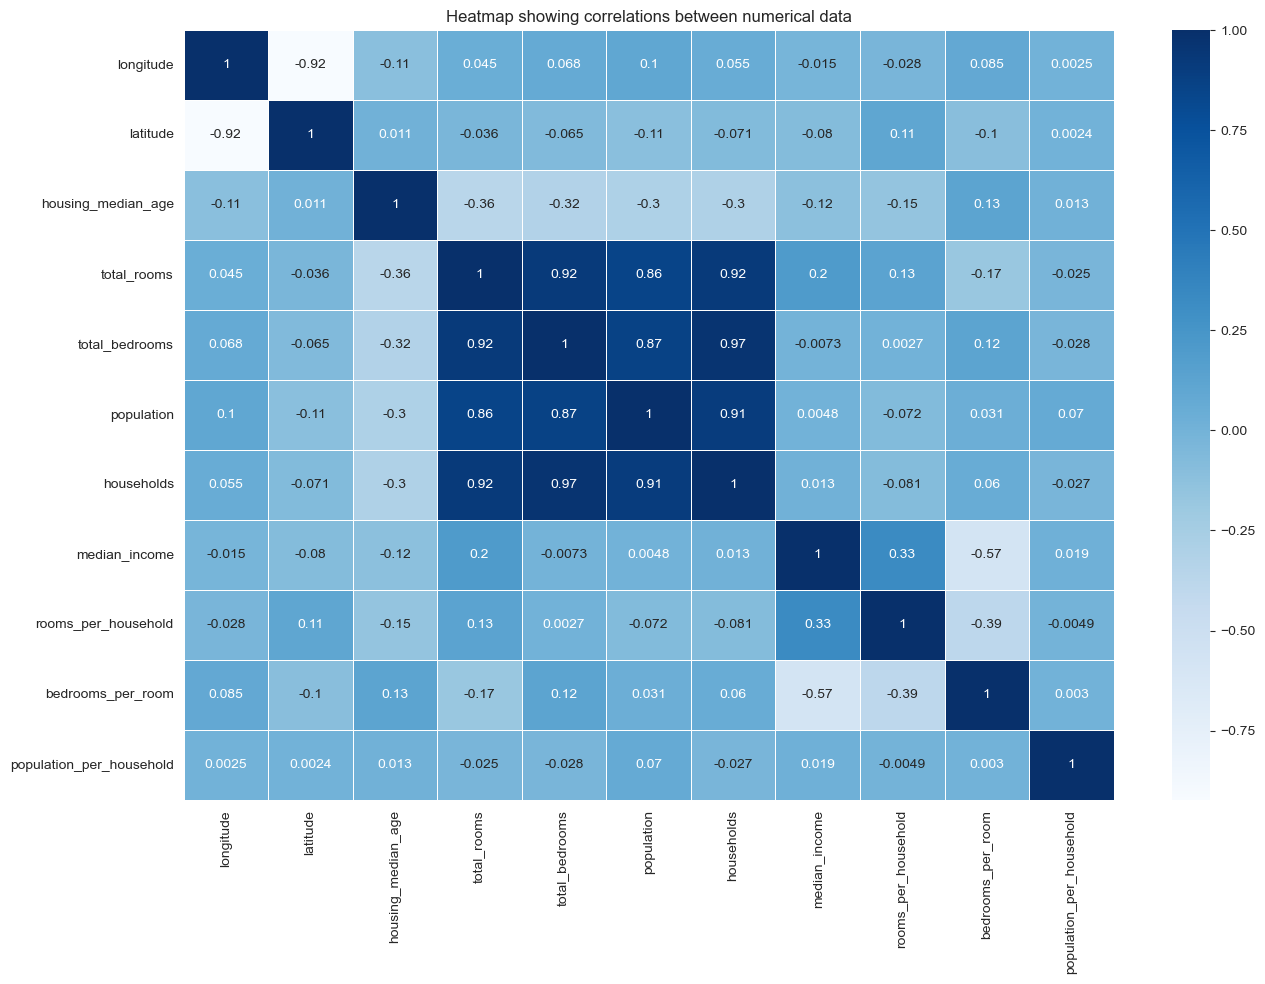

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(15,10))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [149]:
data_numeric.corr().unstack().sort_values(ascending = False)

longitude            longitude              1.000000
latitude             latitude               1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_income        median_income          1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.387465
bedrooms_per_room    median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
longitude            latitude              -0.924664
latitude             longitude             -0.924664
Length: 121, dtype: float64

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [150]:
import numpy as np

mean = data_class['median_house_value'].mean()

y_train = np.where(y_train>=mean,1,0)
y_val = np.where(y_val>=mean,1,0)
y_test = np.where(y_test>=mean,1,0)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [151]:
from sklearn.metrics import mutual_info_score

cat = ['ocean_proximity']
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
round(df_mi, 2)

,MI
ocean_proximity,0.1


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [152]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

num = ['latitude',
       'longitude',
       'housing_median_age',
       'total_rooms',
       'total_bedrooms',
       'population',
       'households',
       'median_income']
cat = ['ocean_proximity']

features = cat + num

def train_model(features_subset):

    train_dict = df_train[features_subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[cat + num].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

print(np.round(train_model(features),2))

0.84


### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    * For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

> **note**: the difference doesn't have to be positive

In [153]:
orig_score = train_model(features)
diffs = {}

for c in features:
    subset = features.copy()
    subset.remove(c)

    score = train_model(subset)
    diffs[c] = orig_score - score
    # print(c, orig_score - score, score)

In [154]:
print(sorted(diffs.items(), key=lambda item: abs(item[1]))[0])

('total_rooms', -0.0007267441860465684)


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [155]:
data_class = df.copy()
print(df.dtypes)
data_class.median_house_value=np.log1p(data_class['median_house_value'])
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

mean = data_class['median_house_value'].mean()

y_train = np.where(y_train>=mean,1,0)
y_val = np.where(y_val>=mean,1,0)
y_test = np.where(y_test>=mean,1,0)

len(df_train), len(df_val), len(df_test)

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object


(12384, 4128, 4128)

In [ ]:
train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(a, round(score, 9))